<a href="https://colab.research.google.com/github/luisflorenz/jupyter_data/blob/main/nyc_taxi_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New York City Taxi Fare Prediction

![](https://i.imgur.com/ecwUY8F.png)

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

We'll train a machine learning model to predict the fare for a taxi ride in New York city given information like pickup date & time, pickup location, drop location and no. of passengers.

This dataset is taken from a [Kaggle competition](ttps://www.kaggle.com/c/new-york-city-taxi-fare-prediction) organized by Google Cloud. It contains over 55 millions rows of training data. We'll attempt to achieve a respectable score in the competition using just a fraction of the data. Along the way, we'll also look at some practical tips for machine learning. PMost of the ideas & techniques covered in this notebook are derived from other public notebooks & blog posts.

To run this notebook, select "Run" > "Run on Colab" and connect your Google Drive account with Jovian. Make sure to use the GPU runtime if you plan on using a GPU.

You can find the completed version of this notebook here: https://jovian.ai/aakashns/nyc-taxi-fare-prediction-filled





> _**TIP #1**: Create an outline for your notebook & for each section before you start coding_



Here's an outline of the project:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online


## 1. Download the Dataset

Steps:

- Install required libraries
- Download data from Kaggle
- View dataset files
- Load training set with Pandas
- Load test set with Pandas

### Install Required Libraries

In [3]:
!pip install jovian opendatasets pandas numpy scikit-learn xgboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

### Download Data from Kaggle

We'll use the [opendatasets](https://github.com/JovianML/opendatasets) library to download the dataset. You'll need to upload your [Kaggle API key](https://github.com/JovianML/opendatasets/blob/master/README.md#kaggle-credentials) (a file called `kaggle.json`) to Colab.

In [5]:
import opendatasets as od

In [6]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction'

In [8]:
od.download(dataset_url)

100%|██████████| 1.56G/1.56G [00:56<00:00, 29.6MB/s]



Extracting archive ./new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to ./new-york-city-taxi-fare-prediction


In [9]:
data_dir = 'new-york-city-taxi-fare-prediction'

### View Dataset Files

Let's look at the size, no. of lines and first few lines of each file.

In [10]:
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Sep 21 14:02 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Sep 21 14:02 sample_submission.csv
-rw-r--r-- 1 root root 960K Sep 21 14:02 test.csv
-rw-r--r-- 1 root root 5.4G Sep 21 14:02 train.csv


In [11]:
!wc -l {data_dir}/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [12]:
!wc -l {data_dir}/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [13]:
!wc -l {data_dir}/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [14]:
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [15]:
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [16]:
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


Observations:

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.



In [ ]:
jovian.commit()

### Loading Training Set

> _**TIP #2**: When working with large datasets, always start with a sample to experiment & iterate faster._

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [17]:
import pandas as pd

In [18]:
sample_fraction = 0.01

In [19]:
import random

In [27]:
random.random()

0.3566402794854461

In [28]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [29]:
dtype= {
    'fare_amount': 'float32',
    'pickup_longitude' : 'float32',
    'pickup_latitude' : 'float32',
    'dropoff_longitude' :'float32',
    'dropoff_latitude' : 'float32',
    'passenger_count' : 'uint8'
}

In [30]:
from pandas.io.formats.format import return_docstring
def skikp_row(row_idx):
  if row_idx == 0:
    return False
  return random.random() > sample_fraction

In [31]:
random.seed(42)

In [32]:
import csv
df = pd.read_csv(data_dir+'/train.csv', usecols=selected_cols, parse_dates=['pickup_datetime'], dtype=dtype, skiprows=skikp_row )

In [33]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1


> _**TIP #3**: Fix the seeds for random number generators so that you get the same results every time you run your notebook._

**Exercise**: Try loading 3%, 10%, 30% and 100% of the data.

### Load Test Set

For the test set, we'll simply provide the data types.

In [34]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtype, parse_dates=['pickup_datetime'])

In [35]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### Training Set

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [37]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [38]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0
- `passenger_count` ranges from 0 to 208
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.


### Test Set

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [40]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [41]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

### Exploratory Data Analysis and Visualization

**Exercise**: Create graphs (histograms, line charts, bar charts, scatter plots, box plots, geo maps etc.) to study the distrubtion of values in each column, and the relationship of each input column to the target.



In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

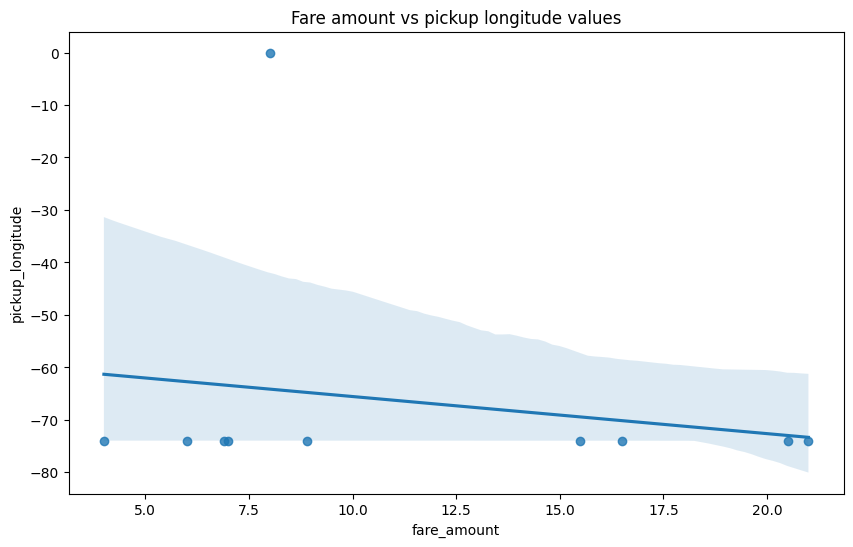

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Fare amount vs pickup longitude values')
sns.regplot(x='fare_amount', y='pickup_longitude', data=df.head(10));


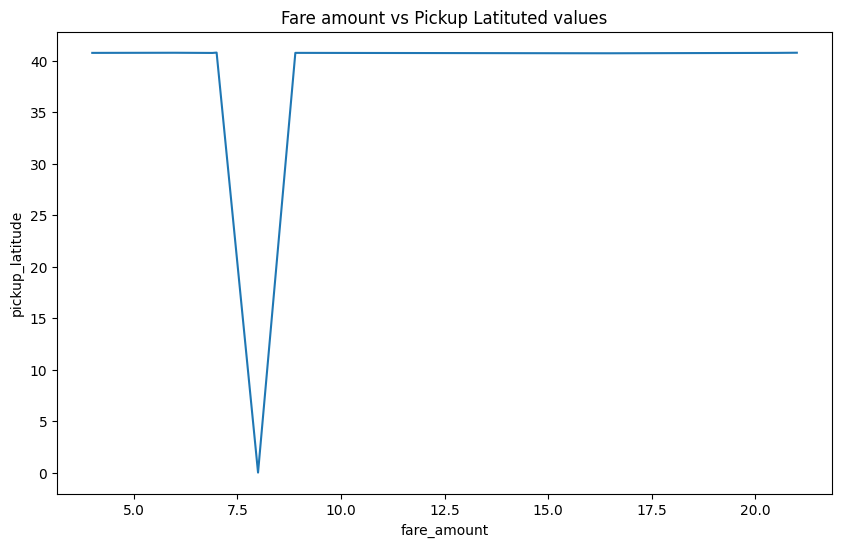

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Fare amount vs Pickup Latituted values')
sns.lineplot(x= 'fare_amount', y= 'pickup_latitude', data=df.head(10));

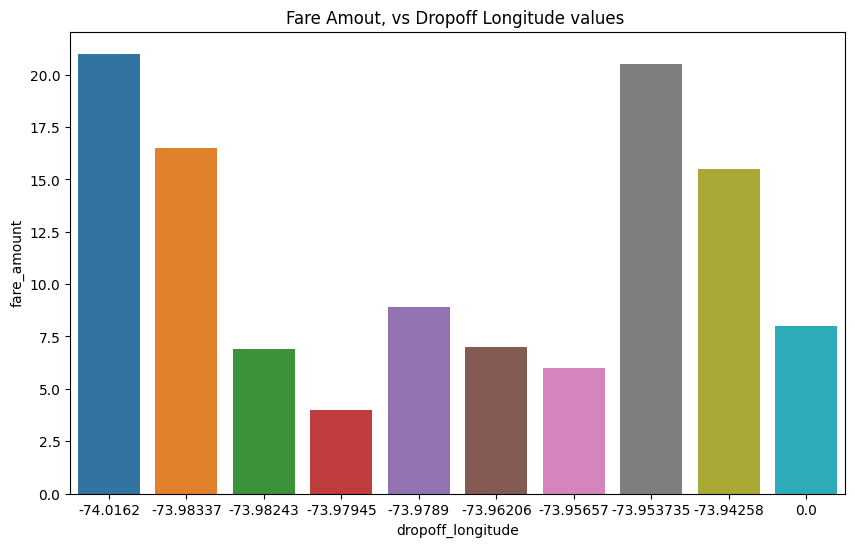

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Fare Amout, vs Dropoff Longitude values ')
sns.barplot(x= 'dropoff_longitude', y= 'fare_amount', data=df.head(10));


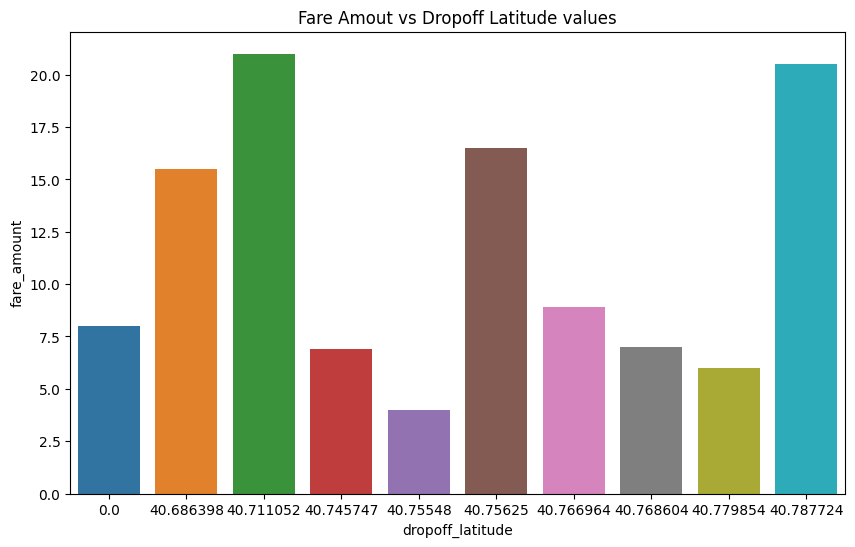

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Fare Amout vs Dropoff Latitude values')
sns.barplot( x= 'dropoff_latitude', y= 'fare_amount', data=df.head(10));

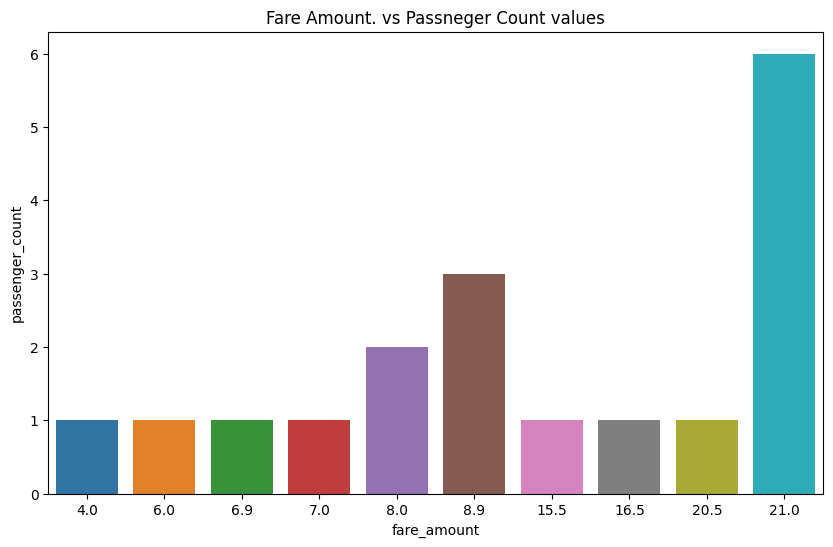

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Fare Amount. vs Passneger Count values')
sns.barplot(x= 'fare_amount', y='passenger_count', data=df.head(10));


In [ ]:
ht = df.corr()

<ipython-input-39-aeb463e7871a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ht = df.corr()


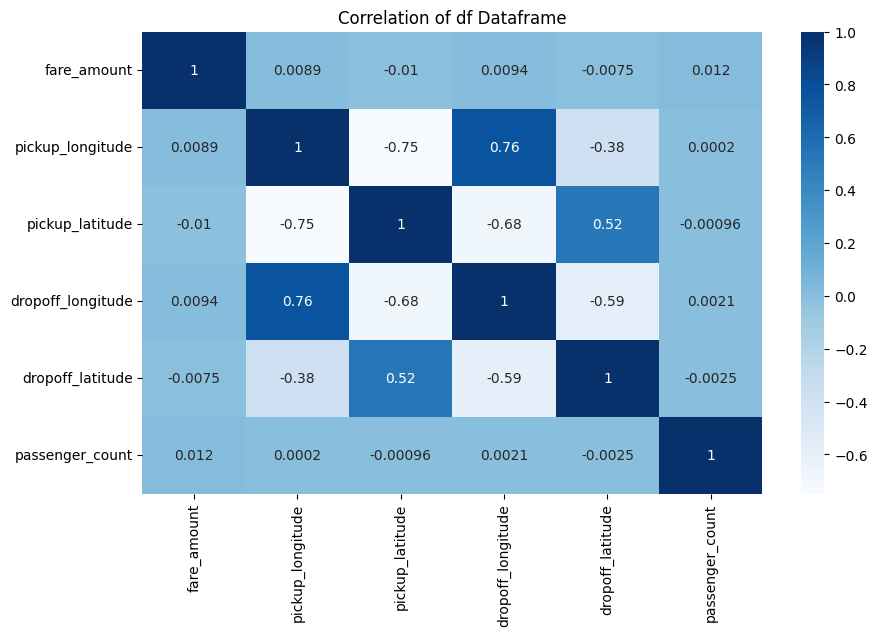

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(ht, annot=True, cmap='Blues')
plt.title('Correlation of df Dataframe')
plt.show()

### Ask & Answer Questions

**Exercise**: Ask & answer questions about the dataset:

1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?
7. ???

Performing EDA on your dataset and asking questions will help you develop a deeper understand of the data and give you ideas for feature engineering.



Resources for exploratory analysis & visualization:

- EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
- Data Analysis with Python: https://zerotopandas.com

> _**TIP #4**: Take an iterative approach to building ML models: do some EDA, do some feature engineering, train a model, then repeat to improve your model._

In [ ]:
jovian.commit()

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - Test

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

> _**TIP #5**: Your validation set should be as similar to the test set or real-world data as possible i.e. the evaluation metric score of a model on validation & test sets should be very close, otherwise you're shooting in the dark._


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [45]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [46]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [47]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [48]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [49]:
target_col = ['fare_amount']

#### Training

In [50]:
train_inputs = train_df[input_cols]

In [51]:
train_targets = train_df[target_col]

In [52]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [53]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


#### Validation

In [54]:
val_inputs = val_df[input_cols]

In [55]:
val_targets = val_df[target_col]

In [56]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [57]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


#### Test

In [58]:
test_inputs = test_df[input_cols]

In [59]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [ ]:
jovian.commit()

## 4. Train Hardcoded & Baseline Models

> _**TIP #6**: Always create a simple hardcoded or baseline model to establish the minimum score any proper ML model should beat._

- Hardcoded model: always predict average fare
- Baseline model: Linear regression

For evaluation the dataset uses RMSE error:
https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.

In [60]:
import numpy as np

In [61]:
class MeanRegressor:
  def fit(self, inputs, targets):
    self.mean = targets.mean()

  def predict(self, inputs):
    return np.full(inputs.shape[0], self.mean)

In [62]:
train_inputs.shape[0]

441960

In [63]:
mean_model = MeanRegressor()

In [64]:
mean_model.fit(train_inputs, train_targets)

In [65]:
mean_model.mean

fare_amount    11.354714
dtype: float32

In [66]:
train_preds = mean_model.predict(train_inputs)

In [67]:
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [68]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [69]:
val_preds = mean_model.predict(val_inputs)

In [70]:
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [70]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
def rmse (targets, preds):
  return mean_squared_error(targets, preds, squared=False)

In [73]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

9.789782

In [74]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

9.899954

Our dumb hard-coded model is off by \$9.899 on average, which is pretty bad considering the average fare is \$11.35.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Train & Evaluate Baseline Model

We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
linear_model = LinearRegression()

In [77]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [78]:
train_preds = linear_model.predict(train_inputs)

In [79]:
train_preds

array([[11.546237],
       [11.28461 ],
       [11.28414 ],
       ...,
       [11.458918],
       [11.284281],
       [11.284448]], dtype=float32)

In [80]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [81]:
rmse(train_targets, train_preds)

9.788632

In [82]:
val_preds = linear_model.predict(val_inputs)

In [83]:
rmse(val_targets, val_preds)

9.898088

The linear regression model is off by $9.898, which isn't much better than simply predicting the average.

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle

> _**TIP #7**: When working on a Kaggle competition, submit early and submit often (ideally daily). The best way to improve your models is to try & beat your previous score._

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [84]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [85]:
test_preds = linear_model.predict(test_inputs)

In [86]:
test_preds

array([[11.28428  ],
       [11.284634 ],
       [11.284384 ],
       ...,
       [11.721249 ],
       [11.7207985],
       [11.720594 ]], dtype=float32)

In [87]:
sub_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [88]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [89]:
sub_df['fare_amount'] = test_preds

In [90]:
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284223
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798


In [91]:
sub_df.to_csv('linear_model_submission.csv', index=None)

> _**TIP #8**: Create reusable functions for common tasks. They'll help you iterate faster and free up your mind to think about new ideas._

In [ ]:
#def predict_and_submit(model, fname):
    #test_preds = model.predict(test_inputs)
    #sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    #sub_df['fare_amount'] = test_preds
    #sub_df.to_csv(fname, index=None)
    #return sub_df

In [92]:
def predict_and_submit(model, test_inputs, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [93]:
predict_and_submit(linear_model, test_inputs, 'linear_sub2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284280
1,2015-01-27 13:08:24.0000003,11.284634
2,2011-10-08 11:53:44.0000002,11.284384
3,2012-12-01 21:12:12.0000002,11.284223
4,2012-12-01 21:12:12.0000003,11.284050
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720277
9910,2015-01-12 17:05:51.0000001,11.720225
9911,2015-04-19 20:44:15.0000001,11.721249
9912,2015-01-31 01:05:19.0000005,11.720798


In [ ]:
jovian.commit()

> _**TIP #9**: Track your ideas & experiments systematically to avoid become overwhelmed with dozens of models. Use this template: https://bit.ly/mltrackingsheet_

## 6. Feature Engineering

> _**TIP #10**: Take an iterative approach to feature engineering. Add some features, train a model, evaluate it, keep the features if they help, otherwise drop them, then repeat._

- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

Exercise: We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour



In [102]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [103]:
add_dateparts(train_df, 'pickup_datetime')

In [104]:
add_dateparts(val_df,'pickup_datetime' )

In [105]:
add_dateparts(test_df, 'pickup_datetime')

In [106]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [107]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16


### Add Distance Between Pickup and Drop

We can use the haversine distance:
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [108]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km


In [109]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'],
                                       df['pickup_latitude'],
                                       df['dropoff_longitude'],
                                       df['dropoff_latitude'])

In [110]:
add_trip_distance(train_df)

In [111]:
add_trip_distance(val_df)

In [112]:
add_trip_distance(test_df)

In [113]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


### Add Distance From Popular Landmarks

> _**TIP #11**: Creative feature engineering (generally involving human insight or external data) is a lot more effective than excessive hyperparameter tuning. Just one or two good feature improve the model's performance drastically._

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location.

In [114]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [115]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])


In [116]:
def add_landmarks(a_df):
  landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
  for name, lonlat in landmarks:
    add_landmark_dropoff_distance(a_df, name, lonlat)

In [117]:
add_landmarks(train_df)

In [118]:
add_landmarks(val_df)

In [119]:
add_landmarks(test_df)

In [120]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


### Remove Outliers and Invalid Data

There seems to be some invalid data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [121]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255057,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [122]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303943,3.295647,4.035820,4.018427,4.252539
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6


In [123]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) &
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) &
              (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) &
              (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) &
              (df['pickup_latitude'] <= 42) &
              (df['dropoff_latitude'] >=40) &
              (df['dropoff_latitude'] <= 42) &
              (df['passenger_count'] >= 1) &
              (df['passenger_count'] <= 6)]

In [124]:
train_df = remove_outliers(train_df)

In [125]:
val_df = remove_outliers(val_df)

### Scaling and One-Hot Encoding

**Exercise**: Try scaling numeric columns to the `(0,1)` range and encoding categorical columns using a one-hot encoder.

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.

### Save Intermediate DataFrames

> _**TIP #12**: Save preprocessed & prepared data files to save time & experiment faster. You may also want to create differnt notebooks for EDA, feature engineering and model training._

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.




In [126]:
train_df.to_parquet('train.parquet')

In [127]:
val_df.to_parquet('val.parquet')

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Ridge Regression
- Random Forests
- Gradient Boosting

Exercise: Train Lasso, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [128]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [129]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [130]:
target_col = 'fare_amount'

In [131]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [132]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [133]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models.

In [134]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

### Ridge Regression

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [135]:
from sklearn.linear_model import Ridge

In [136]:
model1 = Ridge(random_state=42)

In [137]:
model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [138]:
evaluate(model1)

(5.049315152713248,
 5.217865657262104,
 array([ 8.12925918,  4.11578439,  8.75063014, ..., 10.47234932,
         8.2305928 , 10.58672774]),
 array([10.91955339,  6.20493172, 46.21787888, ...,  8.0463052 ,
        25.56885585,  8.45342102]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [139]:
predict_and_submit(model1, test_inputs, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.082151
1,2015-01-27 13:08:24.0000003,11.399499
2,2011-10-08 11:53:44.0000002,5.356923
3,2012-12-01 21:12:12.0000002,8.763571
4,2012-12-01 21:12:12.0000003,14.609918
...,...,...
9909,2015-05-10 12:37:51.0000002,9.024995
9910,2015-01-12 17:05:51.0000001,11.218598
9911,2015-04-19 20:44:15.0000001,47.926481
9912,2015-01-31 01:05:19.0000005,22.600022


In [ ]:
jovian.commit()

### Random Forest

See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
model2 = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=10, n_estimators=100)

In [143]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 9min 58s, sys: 1.24 s, total: 9min 59s
Wall time: 5min 51s


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [144]:
evaluate(model2)

(3.5955102502414134,
 4.161216507784617,
 array([ 6.99399909,  9.10190057,  9.09379987, ..., 10.43082088,
         7.782156  , 10.400694  ]),
 array([12.65433613,  6.14604627, 47.31069124, ...,  8.36589355,
        29.27069612,  8.24300662]))

In [145]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.479748
1,2015-01-27 13:08:24.0000003,10.468653
2,2011-10-08 11:53:44.0000002,5.046148
3,2012-12-01 21:12:12.0000002,8.481902
4,2012-12-01 21:12:12.0000003,14.300374
...,...,...
9909,2015-05-10 12:37:51.0000002,8.694722
9910,2015-01-12 17:05:51.0000001,12.535128
9911,2015-04-19 20:44:15.0000001,55.355344
9912,2015-01-31 01:05:19.0000005,21.467722



This puts us at position ~570 out of 1483 i.e. top 40%, which is already a really good score.

Remember that we're only using 1% of the data, and we haven't done much hyperparameter tuning yet.

In [ ]:
jovian.commit()

### Gradient Boosting

See https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [146]:
from xgboost import XGBRegressor

In [147]:
model3 = XGBRegressor(max_depth=5, objective='reg:squarederror', n_estimators=200, random_state=42, n_jobs=-1)

In [148]:
model3.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [149]:
evaluate(model3)

(3.0546,
 3.940489,
 array([ 6.680765,  6.961979,  9.753767, ..., 11.301361,  9.223042,
        10.525935], dtype=float32),
 array([14.198903 ,  6.2655773, 48.74343  , ...,  7.8903847, 30.208426 ,
         8.469915 ], dtype=float32))

In [151]:
predict_and_submit(model3, test_inputs, 'xgb_submissions.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.374905
1,2015-01-27 13:08:24.0000003,10.966737
2,2011-10-08 11:53:44.0000002,4.813453
3,2012-12-01 21:12:12.0000002,8.499205
4,2012-12-01 21:12:12.0000003,16.425694
...,...,...
9909,2015-05-10 12:37:51.0000002,8.555050
9910,2015-01-12 17:05:51.0000001,11.273957
9911,2015-04-19 20:44:15.0000001,52.688992
9912,2015-01-31 01:05:19.0000005,19.483288




This submission isn't as good as the random forest, but there's scope for improvement with Hyperparameter tuning.

In [ ]:
jovian.commit()

## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [152]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], []
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)

    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [158]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: user 25min 19s, sys: 2.73 s, total: 25min 22s
Wall time: 15min 18s


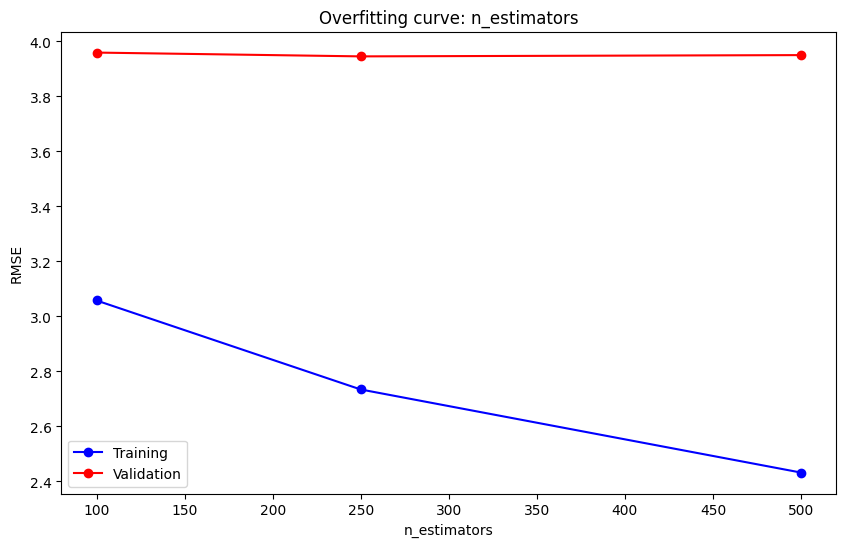

In [159]:
%%time
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [160]:
best_params['n_estimators'] = 250

### Max Depth

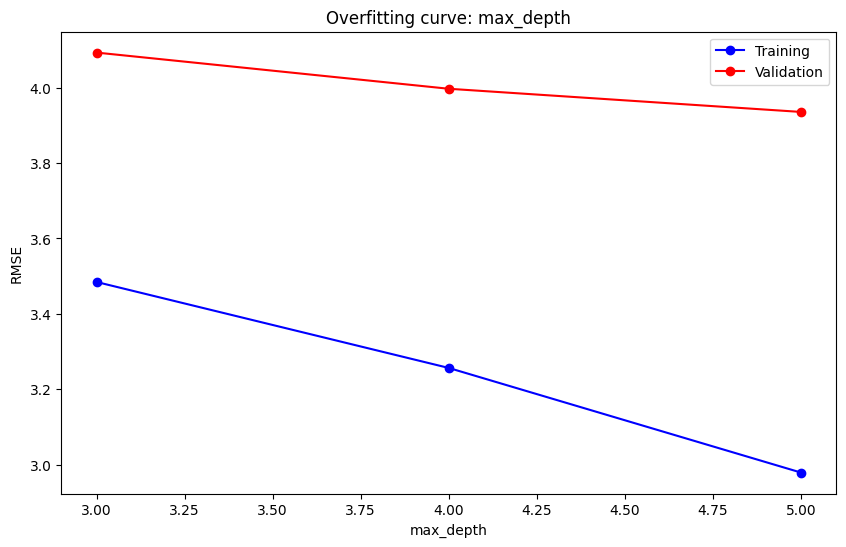

In [162]:
test_param_and_plot(XGBRegressor,'max_depth', [3, 4, 5], **best_params  )

Looks like a max depth of 5 is ideal.

In [163]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 18min 14s, sys: 1.73 s, total: 18min 16s
Wall time: 11min


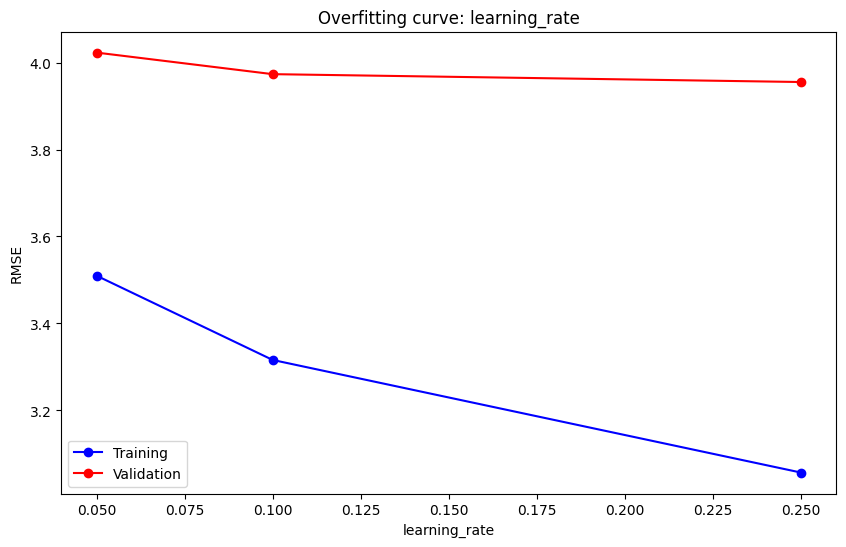

In [164]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.

In [165]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters.

Here's a set of parameters that works well:

In [168]:
xgb_model_final = XGBRegressor(objective='reg:squarederror',
                               n_jobs=-1,
                               random_state=42,
                               n_estimators=500,
                               max_depth=5,
                               learning_rate=0.1,
                               subsample=0.8,
                               colsample_bytree=0.8)

In [169]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 9min 4s, sys: 781 ms, total: 9min 5s
Wall time: 5min 28s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [170]:
evaluate(xgb_model_final)

(3.1499705,
 3.9390318,
 array([ 6.335184 ,  7.9064064,  9.977738 , ..., 11.5949   ,  9.106494 ,
        10.397403 ], dtype=float32),
 array([13.694823 ,  6.0362816, 48.13421  , ...,  7.6722383, 30.460674 ,
         8.743032 ], dtype=float32))

In [171]:
predict_and_submit(xgb_model_final, test_inputs, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.861362
1,2015-01-27 13:08:24.0000003,10.889787
2,2011-10-08 11:53:44.0000002,4.784571
3,2012-12-01 21:12:12.0000002,8.976275
4,2012-12-01 21:12:12.0000003,15.920312
...,...,...
9909,2015-05-10 12:37:51.0000002,8.711966
9910,2015-01-12 17:05:51.0000001,11.896454
9911,2015-04-19 20:44:15.0000001,53.452782
9912,2015-01-31 01:05:19.0000005,19.724787




This puts us at the ~460th position out of 1483 i.e. top 30%. This is pretty amazing considering:

- We are using just 1% of the training data
- We are only using a single model (most top submissions use ensembles)
- Our best model takes just 10 minutes to train (as oppposed to hours/days)
- We haven't fully optimized the hyperparameters yet

Let's save the weights of this model. Follow this guide: https://scikit-learn.org/stable/modules/model_persistence.html

In [ ]:
jovian.commit()

**Exercises**:

1. Tune hyperparameters for Linear Regression & random forests.
2. Repeat with 3%, 10%, 30% and 100% of the training set. How much reduction in error does 100x more data produce?
3. Ensemble (average) the results from multiple models and observe if they're better than individual models.

### Save Model Weights to Google Drive (Optional)

We can save all the output files we've created to Google Drive, so that we can reuse them later if required.

Follow these guides:
- https://scikit-learn.org/stable/modules/model_persistence.html
- https://colab.research.google.com/notebooks/io.ipynb

## 9. Train on GPU with entire dataset (Optional)

Steps:
- Install `dask`, `cudf` and `cuml`
- Load the dataset to GPU
- Create training and validation set
- Perform feature engineering
- Train XGBoost `cuml` model
- Make predictions & submit

Follow these guides and fill out the empty cells below:
- https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24
- https://jovian.ai/allenkong221/nyc-taxi-fare-rapids-dask-gpu/v/1?utm_source=embed#C10
- https://developer.nvidia.com/blog/accelerating-xgboost-on-gpu-clusters-with-dask/
- https://rapids.ai/xgboost.html

### Install `dask`, `cudf` and `cuml`

### Load the data

### Create training & validation set

### Perform feature engineering

### Train XGBoost model on GPU

### Make Predictions & Submit

## 10. Document & Publish Your Work

> _**TIP #13**: Always document & publish your projects online. They help improve your understanding, showcase your skills & often lead to inbound job opportunities._

- Add explanations using Markdown
- Clean up the code & create functions
- Publish notebook to Jovian
- Write a blog post and embed

Follow this guide: https://www.youtube.com/watch?v=NK6UYg3-Bxs

## References

* Dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview
* Missing semester (Shell scripting): https://missing.csail.mit.edu/
* Opendatsets library: https://github.com/JovianML/opendatasets
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* GeoPy: https://geopy.readthedocs.io/en/stable/#module-geopy.distance
* Blog post by Allen Kong: https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet
* Pandas datetime components: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components
* Haversine distance: https://en.wikipedia.org/wiki/Haversine_formula
* Haversine distance with Numpy: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas
* RAPIDS (parent project for cudf and cuml): https://rapids.ai/
* Data Science blog post from scratch: https://www.youtube.com/watch?v=NK6UYg3-Bxs
* Examples of Machine Learning Projects:
    * Walmart Store Sales: https://jovian.ai/anushree-k/final-walmart-simple-rf-gbm
    * Used Car Price Prediction: https://jovian.ai/kara-mounir/used-cars-prices
    * Lithology Prediction: https://jovian.ai/ramysaleem/ml-project-machine-predicting-lithologies
    * Ad Demand Prediction: https://jovian.ai/deepa-sarojam/online-ad-demand-prediction-ml-prj
    * Financial distress prediction: https://jovian.ai/sm-wilson/ml-project-financial-distress-prediction
    * Credit scoring: https://jovian.ai/shenghongzhong/credit-scores-algorithms-ml-2



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns/nyc-taxi-fare-prediction-blank


'https://jovian.ai/aakashns/nyc-taxi-fare-prediction-blank'